# Boston House prices prediction


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.data.shape)
print(boston["feature_names"])

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


1. CRIM per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per 10,000usd
11. PTRATIO pupil-teacher ratio by town
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT % lower status of the populatio

In [3]:
boston_X = boston.data   ##get the feature
boston_y = boston.target ##obtain price label
boston_data = pd.DataFrame(boston_X)
boston_data.columns = boston.feature_names
boston_data["PRICE"]=boston_y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Generate a correlation matrix to visualize relationships between features

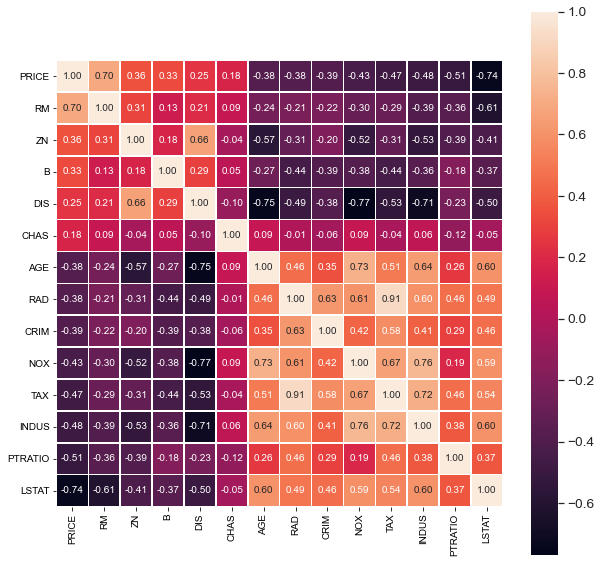

In [4]:
fig, ax = plt.subplots(figsize=(10,10)) 
corrmat = boston_data.corr()
k  = 14 # show 14 features
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(boston_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, linewidths=.5, ax=ax)
plt.show()

Convert dataframe to numpy arrays

In [5]:
data_X=boston_data[['LSTAT','RM','PTRATIO','DIS','ZN']].to_numpy()
data_y=boston_data[['PRICE']].to_numpy()

In [6]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge    
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn import metrics

Split training/test data

In [7]:
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y,test_size=0.33,random_state=3)
boston_X.shape

(506, 13)

### Linear Regression

In [8]:
model = LinearRegression()
model.fit(X_train,y_train)

print("evaluation on training dataset: ")
train_pred = model.predict(X_train)
mse = metrics.mean_squared_error(y_train, train_pred) 
print("mean square error: ", mse)

print("\nevaluation on test dataset: ")
test_pred = model.predict(X_test)
mse = metrics.mean_squared_error(y_test, test_pred) 
print("mean square error: ", mse)

evaluation on training dataset: 
mean square error:  25.94417361576644

evaluation on test dataset: 
mean square error:  26.421868023858345


### Polynomial Regression

In [9]:
def polynomial_model(degree=1):
    polynomial_features=PolynomialFeatures(degree,include_bias=False)
    linear_regression=LinearRegression(normalize=True)
    pipeline=Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    return pipeline

In [10]:
degrees=[1,2,3,4,5]

#Empty lists to store train and test error values 
train_err = []
test_err = []

#Try all 5 degree values with a polynomial model (defined above)
for degree in degrees:
  model = polynomial_model(degree)
  model.fit(X_train,y_train)

  train_pred = model.predict(X_train)
  mse = metrics.mean_squared_error(y_train, train_pred) 
  train_err.append(mse)

  test_pred = model.predict(X_test)
  mse = metrics.mean_squared_error(y_test, test_pred) 
  test_err.append(mse)

Visualize train/test error across different polynomial degree values

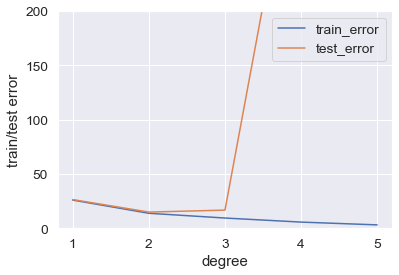

In [11]:
plt.plot(degrees,train_err,label='train_error')
plt.plot(degrees,test_err,label='test_error')
plt.ylim(0, 200)
plt.xlabel('degree')
plt.ylabel('train/test error')
plt.legend()
plt.xticks([1,2,3,4,5])     
plt.show()